<a href="https://colab.research.google.com/github/anandhanks20-dev/Anandhan-new/blob/main/Intermediate_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive

file_path = '/content/drive/MyDrive/DSA Folder/Dataset/train_LZdllcl.csv'

train_df = pd.read_csv(file_path)
train_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [ ]:
train_df.duplicated().sum()

np.int64(0)

In [ ]:
train_df.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [ ]:
education_mode = train_df['education'].mode()[0]
train_df['education'] = train_df['education'].fillna(education_mode)

In [ ]:
previous_year_rating_median = train_df['previous_year_rating'].median()
train_df['previous_year_rating'] = train_df['previous_year_rating'].fillna(previous_year_rating_median)

<Axes: >

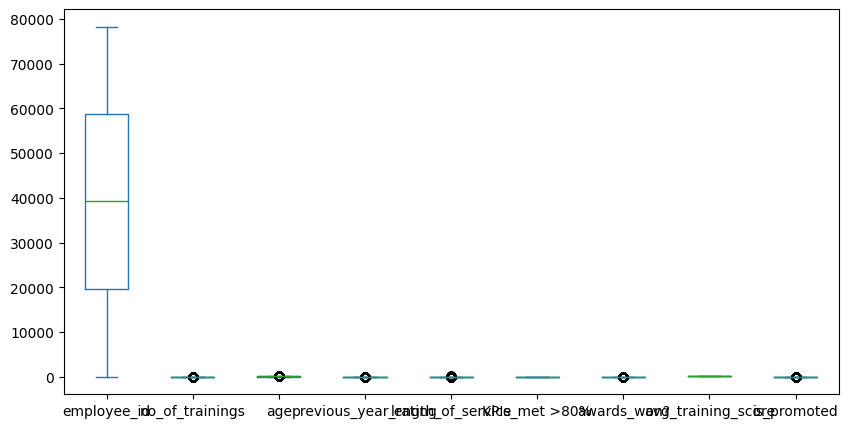

In [ ]:
train_df.plot(kind='box',figsize=(10,5))

In [ ]:
# Create a list of columns to exclude
# We exclude the target ('is_promoted') AND the identifier ('employee_id')
to_exclude = ['is_promoted', 'employee_id']

# Select numerical columns that are NOT in our exclusion list
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cols_to_process = [col for col in num_cols if col not in to_exclude]

for col in cols_to_process:
    # Capping logic (Robust Outlier Handling)
    upper_limit = train_df[col].quantile(0.95)
    lower_limit = train_df[col].quantile(0.05)

    train_df[col] = np.where(train_df[col] > upper_limit, upper_limit,
                             np.where(train_df[col] < lower_limit, lower_limit, train_df[col]))

    # Apply to test_df separately
    test_df[col] = np.where(test_df[col] > upper_limit, upper_limit,
                            np.where(test_df[col] < lower_limit, lower_limit, test_df[col]))

print("Outliers handled for valid numerical columns.")

Outliers handled for valid numerical columns.


<Axes: >

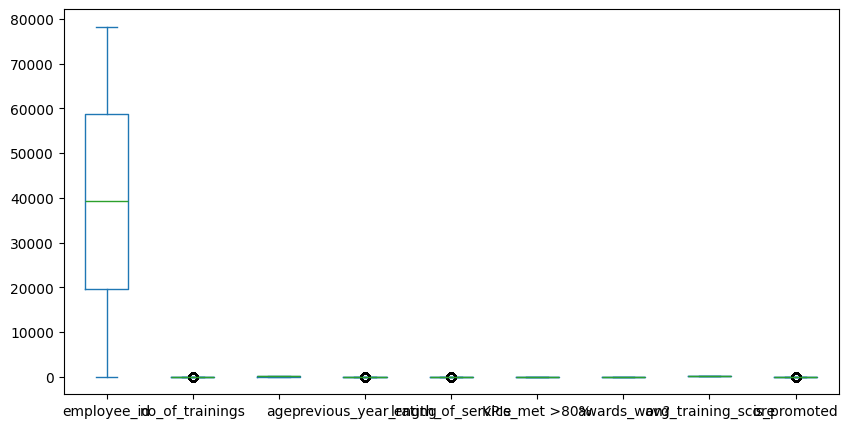

In [ ]:
train_df.plot(kind='box',figsize=(10,5))

## One-Hot Encode Categorical Features

In [ ]:
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
print("Categorical columns list created.")

Categorical columns list created.


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(train_df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

train_df = pd.concat([train_df.reset_index(drop=True), encoded_df], axis=1)
train_df.drop(columns=categorical_cols, inplace=True)

print("One-hot encoding complete and original columns dropped.")
print("Updated DataFrame head:")
print(train_df.head())

One-hot encoding complete and original columns dropped.
Updated DataFrame head:
   employee_id  no_of_trainings   age  previous_year_rating  \
0        65438              1.0  35.0                   5.0   
1        65141              1.0  30.0                   5.0   
2         7513              1.0  34.0                   3.0   
3         2542              2.0  39.0                   1.0   
4        48945              1.0  45.0                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                8.0            1.0          0.0                49.0   
1                4.0            0.0          0.0                60.0   
2                7.0            0.0          0.0                50.0   
3               10.0            0.0          0.0                50.0   
4                2.0            0.0          0.0                73.0   

   is_promoted  department_Analytics  ...  region_region_8  region_region_9  \
0            0               

In [ ]:
X = train_df.drop(columns=['employee_id', 'is_promoted'])
y = train_df['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets successfully using the updated train_df.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully using the updated train_df.
X_train shape: (43846, 58)
X_test shape: (10962, 58)
y_train shape: (43846,)
y_test shape: (10962,)


## Scale Numerical Features




In [ ]:
numerical_cols_to_scale = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
print("Numerical columns list created.")

Numerical columns list created.


In [ ]:
scaler = StandardScaler()
train_df[numerical_cols_to_scale] = scaler.fit_transform(train_df[numerical_cols_to_scale])
print("Numerical features scaled using StandardScaler.")
print("Updated DataFrame head with scaled features:")
print(train_df[numerical_cols_to_scale].head())

Numerical features scaled using StandardScaler.
Updated DataFrame head with scaled features:
   no_of_trainings       age  previous_year_rating  length_of_service  \
0        -0.484795  0.047830              1.395766           0.626630   
1        -0.484795 -0.662436              1.395766          -0.457566   
2        -0.484795 -0.094223             -0.250651           0.355581   
3         2.062727  0.616042             -1.897069           1.168728   
4        -0.484795  1.468361             -0.250651          -0.999664   

   avg_training_score  
0           -1.104256  
1           -0.256648  
2           -1.027200  
3           -1.027200  
4            0.745070  


## Modeling

### Logistic Regression model



In [ ]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)
print("Logistic Regression model initialized and trained successfully.")

Logistic Regression model initialized and trained successfully.


In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Precision: {precision:.4f}")
print(f"Logistic Regression Recall: {recall:.4f}")
print(f"Logistic Regression F1-Score: {f1:.4f}")

Logistic Regression Accuracy: 0.9290
Logistic Regression Precision: 0.8223
Logistic Regression Recall: 0.2131
Logistic Regression F1-Score: 0.3384


### K-Nearest Neighbors model

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("K-Nearest Neighbors model initialized and trained successfully.")

K-Nearest Neighbors model initialized and trained successfully.


In [ ]:
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")
print(f"K-Nearest Neighbors Precision: {precision_knn:.4f}")
print(f"K-Nearest Neighbors Recall: {recall_knn:.4f}")
print(f"K-Nearest Neighbors F1-Score: {f1_knn:.4f}")

K-Nearest Neighbors Accuracy: 0.9173
K-Nearest Neighbors Precision: 0.5849
K-Nearest Neighbors Recall: 0.0996
K-Nearest Neighbors F1-Score: 0.1702


###  Decision Tree Classifier model

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree Classifier model initialized and trained successfully.")

Decision Tree Classifier model initialized and trained successfully.


In [ ]:
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1-Score: {f1_dt:.4f}")

Decision Tree Accuracy: 0.8961
Decision Tree Precision: 0.3976
Decision Tree Recall: 0.4261
Decision Tree F1-Score: 0.4114


### Summary

In [ ]:
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree'],
    'Accuracy': [accuracy, accuracy_knn, accuracy_dt],
    'Precision': [precision, precision_knn, precision_dt],
    'Recall': [recall, recall_knn, recall_dt],
    'F1-Score': [f1, f1_knn, f1_dt]
})

print("Model Performance Summary:")
print(model_performance.round(4))

Model Performance Summary:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9290     0.8223  0.2131    0.3384
1  K-Nearest Neighbors    0.9173     0.5849  0.0996    0.1702
2        Decision Tree    0.8961     0.3976  0.4261    0.4114


# TEST DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path_test = '/content/drive/MyDrive/DSA Folder/Dataset/test_2umaH9m.csv'
test_df = pd.read_csv(file_path_test)
test_df.head()

Mounted at /content/drive


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [ ]:
test_df.duplicated().sum()

np.int64(0)

In [ ]:
test_df.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [ ]:
# Fill education with the mode from the training data
test_df['education'] = test_df['education'].fillna(education_mode)

# Fill previous_year_rating with the median from the training data
test_df['previous_year_rating'] = test_df['previous_year_rating'].fillna(previous_year_rating_median)

test_df.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


<Axes: >

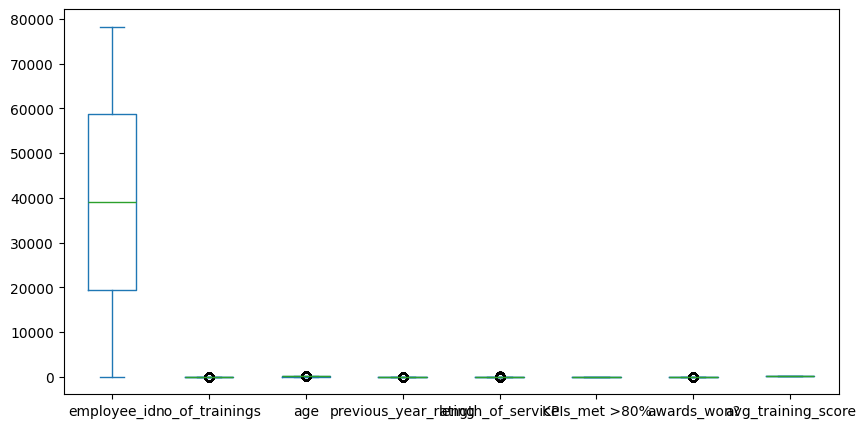

In [ ]:
test_df.plot(kind='box',figsize=(10,5))

In [ ]:
print("Removing outliers from test_df numerical columns...")
for col in columns_to_clip:
    remove_outliers_iqr(test_df, col)

print("Outlier removal complete for specified columns in test_df.")

Removing outliers from test_df numerical columns...
Outliers in 'no_of_trainings' clipped using IQR method.
Outliers in 'age' clipped using IQR method.
Outliers in 'previous_year_rating' clipped using IQR method.
Outliers in 'length_of_service' clipped using IQR method.
Outliers in 'avg_training_score' clipped using IQR method.
Outlier removal complete for specified columns in test_df.


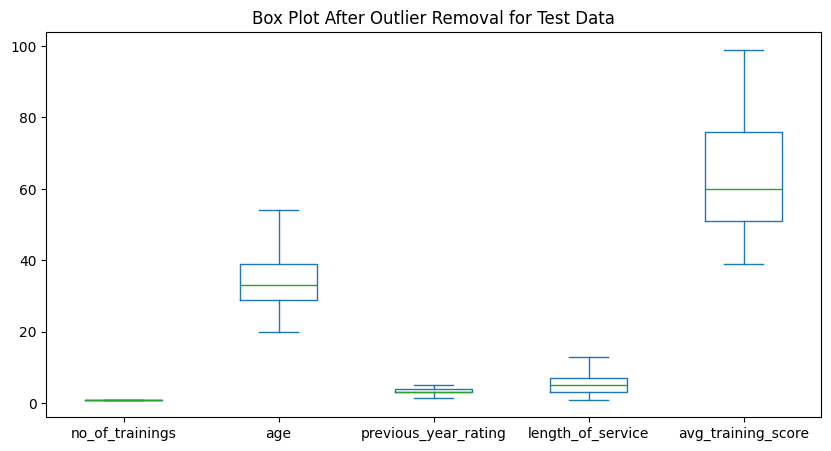

In [ ]:
test_df[columns_to_clip].plot(kind='box', figsize=(10, 5), title='Box Plot After Outlier Removal for Test Data')
plt.show()

In [ ]:
encoded_features_test = encoder.transform(test_df[categorical_cols])
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(categorical_cols))

test_df = pd.concat([test_df.reset_index(drop=True), encoded_df_test], axis=1)
test_df.drop(columns=categorical_cols, inplace=True)

print("One-hot encoding complete and original columns dropped for test_df.")
print("Updated test_df head:")
print(test_df.head())

One-hot encoding complete and original columns dropped for test_df.
Updated test_df head:
   employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0         8724                1   24                   3.0                  1   
1        74430                1   31                   3.0                  5   
2        72255                1   31                   1.5                  4   
3        38562                1   31                   2.0                  9   
4        64486                1   30                   4.0                  7   

   KPIs_met >80%  awards_won?  avg_training_score  department_Analytics  \
0              1            0                  77                   0.0   
1              0            0                  51                   0.0   
2              0            0                  47                   0.0   
3              0            0                  65                   0.0   
4              0            0                  6

In [ ]:
test_df = test_df.drop(columns=['employee_id'])

In [ ]:
min_max_scaler = MinMaxScaler()
X_train[numerical_cols_to_scale] = min_max_scaler.fit_transform(X_train[numerical_cols_to_scale])

print("MinMaxScaler applied to X_train numerical features.")
print(X_train[numerical_cols_to_scale].head())

MinMaxScaler applied to X_train numerical features.
       no_of_trainings       age  previous_year_rating  length_of_service  \
25890              0.0  1.000000                   0.5           1.000000   
24121              0.0  0.538462                   1.0           0.642857   
483                0.0  0.423077                   0.5           0.214286   
14389              0.0  0.576923                   0.5           0.071429   
45182              1.0  0.615385                   0.5           0.285714   

       avg_training_score  
25890            0.384615  
24121            0.589744  
483              0.641026  
14389            0.102564  
45182            0.897436  


In [ ]:
X_test[numerical_cols_to_scale] = min_max_scaler.transform(X_test[numerical_cols_to_scale])

print("MinMaxScaler applied to X_test numerical features.")
print(X_test[numerical_cols_to_scale].head())

MinMaxScaler applied to X_test numerical features.
       no_of_trainings       age  previous_year_rating  length_of_service  \
20086              0.0  0.230769                   1.0           0.285714   
42717              0.0  0.076923                   0.5           0.071429   
21488              0.0  0.653846                   0.5           0.571429   
44557              0.0  0.115385                   0.5           0.357143   
1422               1.0  0.038462                   0.5           0.142857   

       avg_training_score  
20086            0.076923  
42717            0.128205  
21488            0.000000  
44557            0.641026  
1422             0.589744  


### Logistic Regression model

In [ ]:
y_pred = model.predict(X_test)

## Create Submission File

Make predictions on the preprocessed test data using the best-performing model and generate a submission file in the required format.

In [ ]:
# Load the original test_df to get employee_id for submission
original_test_df = pd.read_csv(file_path_test)

# Make predictions on the preprocessed test_df using the Decision Tree model
# Assuming dt_model is the best model chosen
predictions = dt_model.predict(test_df)

# Create a submission DataFrame
submission_df = pd.DataFrame({'employee_id': original_test_df['employee_id'], 'is_promoted': predictions})

# Save the submission DataFrame to a CSV file
submission_file_path = '/content/drive/MyDrive/DSA Folder/Dataset/submission.csv'
submission_df.to_csv(submission_file_path, index=False)

submission_df.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
